In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gsw
import cmocean.cm as cmo
import plotly.graph_objects as go
import plotly.express as px

ds = xr.open_dataset('WOA23.nc') #ds is the dataset

p=gsw.conversions.p_from_z(-ds.depth, ds.lat)
#compute conservative temperature
ct_an=gsw.conversions.CT_from_t(ds.s_an, ds.t_an, p)
#add conservative temperature to the dataset
ds['ct_an']=ct_an

abs_sal = gsw.conversions.SA_from_SP(ds.s_an, p, ds.lon, ds.lat)
ds['abs_sal'] = abs_sal

ds

<xarray.Dataset> Size: 185MB
Dimensions:  (lat: 180, lon: 360, depth: 102)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 408B 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Data variables:
    t_an     (depth, lat, lon) float32 26MB ...
    s_an     (depth, lat, lon) float32 26MB ...
    o_an     (depth, lat, lon) float32 26MB ...
    ct_an    (depth, lat, lon) float64 53MB nan nan nan nan ... nan nan nan nan
    abs_sal  (depth, lat, lon) float64 53MB nan nan nan nan ... nan nan nan nan
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2023 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R.A., A.V. Mishonov, O.K. Bar...
    institution:                     NOAA National Centers for Environmental ...
    comment:                         Global Climatology as part of the World ...
    ...                              ...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/products/world...
    date_created:                    2024-01-28 
    date_modified:                   2024-01-28

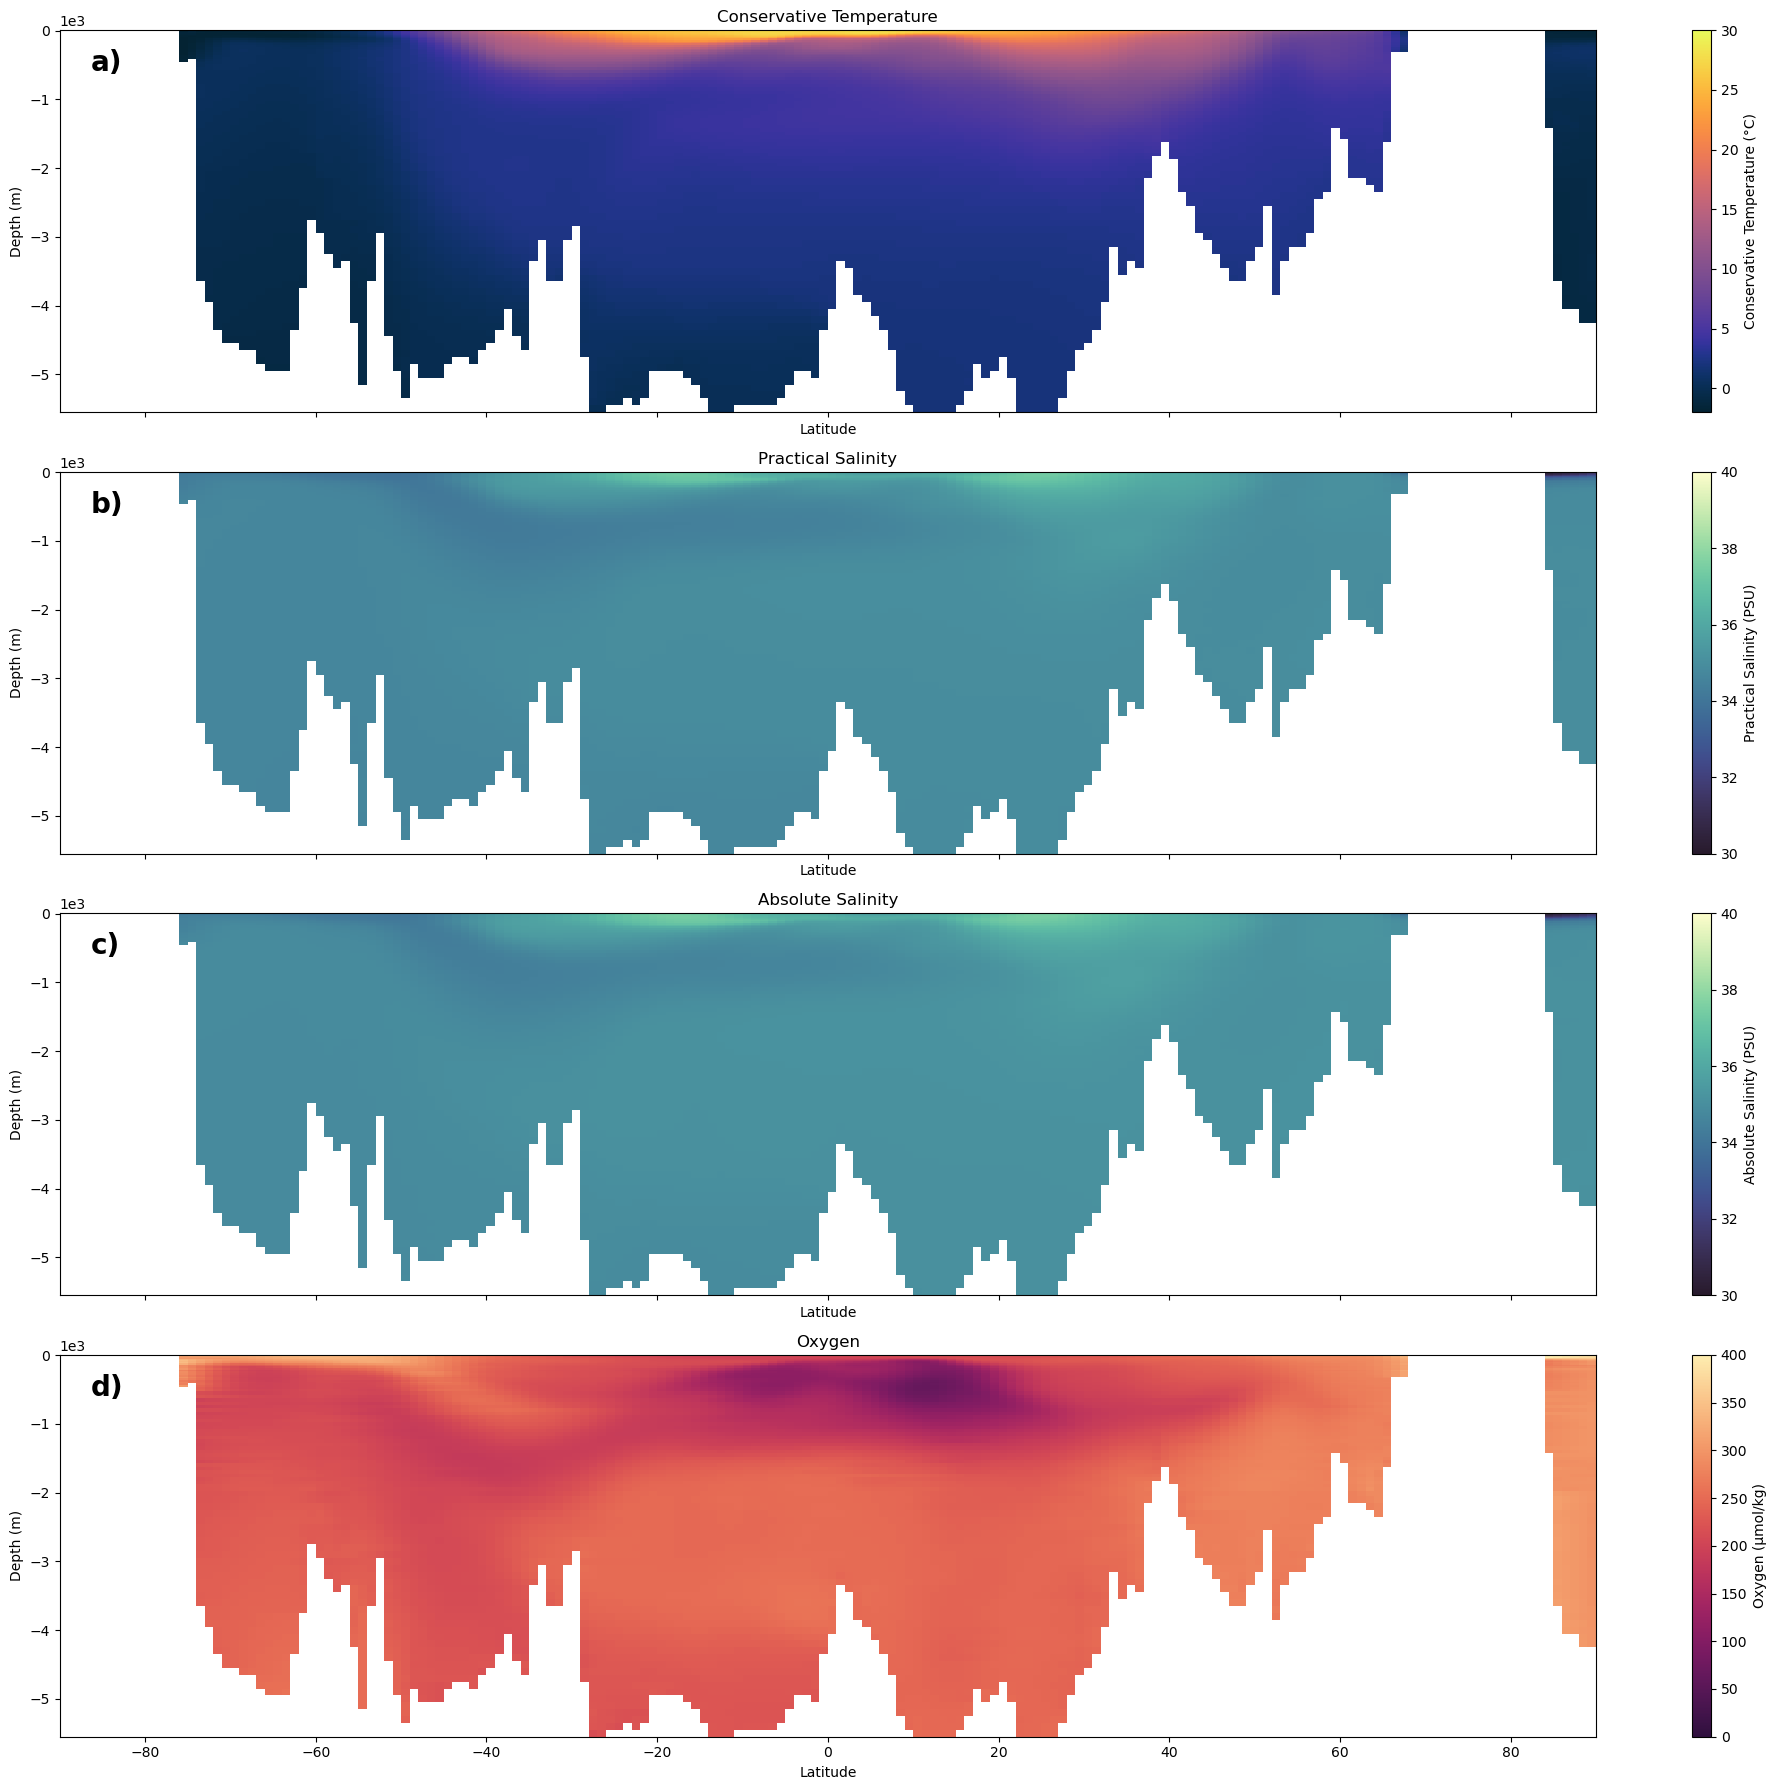

In [2]:
# Atlantic Section

profile_atl = ds.sel(lon=-30,method='nearest')
tmin = -2
tmax = 30
salmin = 30
salmax = 40
oxmin = 0
oxmax = 400

fig, ax = plt.subplots(4,1, figsize=(20,18), sharex=True)

p1=ax[0].pcolormesh(profile_atl.lat, -profile_atl.depth, profile_atl['ct_an'], cmap=cmo.thermal, vmin=tmin, vmax=tmax)
#p1 = ax[0].contourf(profile_atl.lat, -profile_atl.depth, profile_atl['ct_an'], cmap=cmo.thermal, levels=np.arange(tmin, tmax, 1))
#cs = ax[0].clabel(p1, inline=True, fmt='%0.1f', fontsize=8, colors='gray')
plt.colorbar(p1, ax=ax[0], label='Conservative Temperature (°C)')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('Conservative Temperature')
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax[0].text(0.02, 0.95, "a)", transform=ax[0].transAxes, fontsize=20, fontweight='bold', verticalalignment='top')

p2=ax[1].pcolormesh(profile_atl.lat, -profile_atl.depth, profile_atl['s_an'], cmap=cmo.deep_r, vmin=salmin, vmax=salmax)
#p2 = ax[1].contourf(profile_atl.lat, -profile_atl.depth, profile_atl['s_an'], cmap=cmo.deep_r, levels=np.arange(salmin, salmax, 0.5))
#cs = ax[1].clabel(p2, inline=True, fmt='%0.1f', fontsize=8, colors='gray')
plt.colorbar(p2, ax=ax[1], label='Practical Salinity (PSU)')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('Practical Salinity')
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax[1].text(0.02, 0.95, "b)", transform=ax[1].transAxes, fontsize=20, fontweight='bold', verticalalignment='top')

p3=ax[2].pcolormesh(profile_atl.lat, -profile_atl.depth, profile_atl['abs_sal'], cmap=cmo.deep_r, vmin=salmin, vmax=salmax)
#p3 = ax[2].contourf(profile_atl.lat, -profile_atl.depth, profile_atl['abs_sal'], cmap=cmo.deep_r, levels=np.arange(salmin, salmax, 0.5))
#cs = ax[2].clabel(p3, inline=True, fmt='%0.1f', fontsize=8, colors='gray')
plt.colorbar(p3, ax=ax[2], label='Absolute Salinity (PSU)')
ax[2].set_xlabel('Latitude')
ax[2].set_ylabel('Depth (m)')
ax[2].set_title('Absolute Salinity')
ax[2].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax[2].text(0.02, 0.95, "c)", transform=ax[2].transAxes, fontsize=20, fontweight='bold', verticalalignment='top')

p4=ax[3].pcolormesh(profile_atl.lat, -profile_atl.depth, profile_atl['o_an'], cmap=cmo.matter_r, vmin=oxmin, vmax=oxmax)
#p4 = ax[3].contourf(profile_atl.lat, -profile_atl.depth, profile_atl['o_an'], cmap=cmo.matter, levels=np.arange(oxmin, oxmax, 20))
#cs = ax[3].clabel(p4, inline=True, fmt='%0.0f', fontsize=8, colors='gray')
plt.colorbar(p4, ax=ax[3], label='Oxygen (µmol/kg)')
ax[3].set_xlabel('Latitude')
ax[3].set_ylabel('Depth (m)')
ax[3].set_title('Oxygen')
ax[3].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax[3].text(0.02, 0.95, "d)", transform=ax[3].transAxes, fontsize=20, fontweight='bold', verticalalignment='top')
plt.tight_layout()
plt.savefig('images/Atlantic_section.jpg', dpi=300, bbox_inches='tight', transparent=False, pad_inches=0.05)

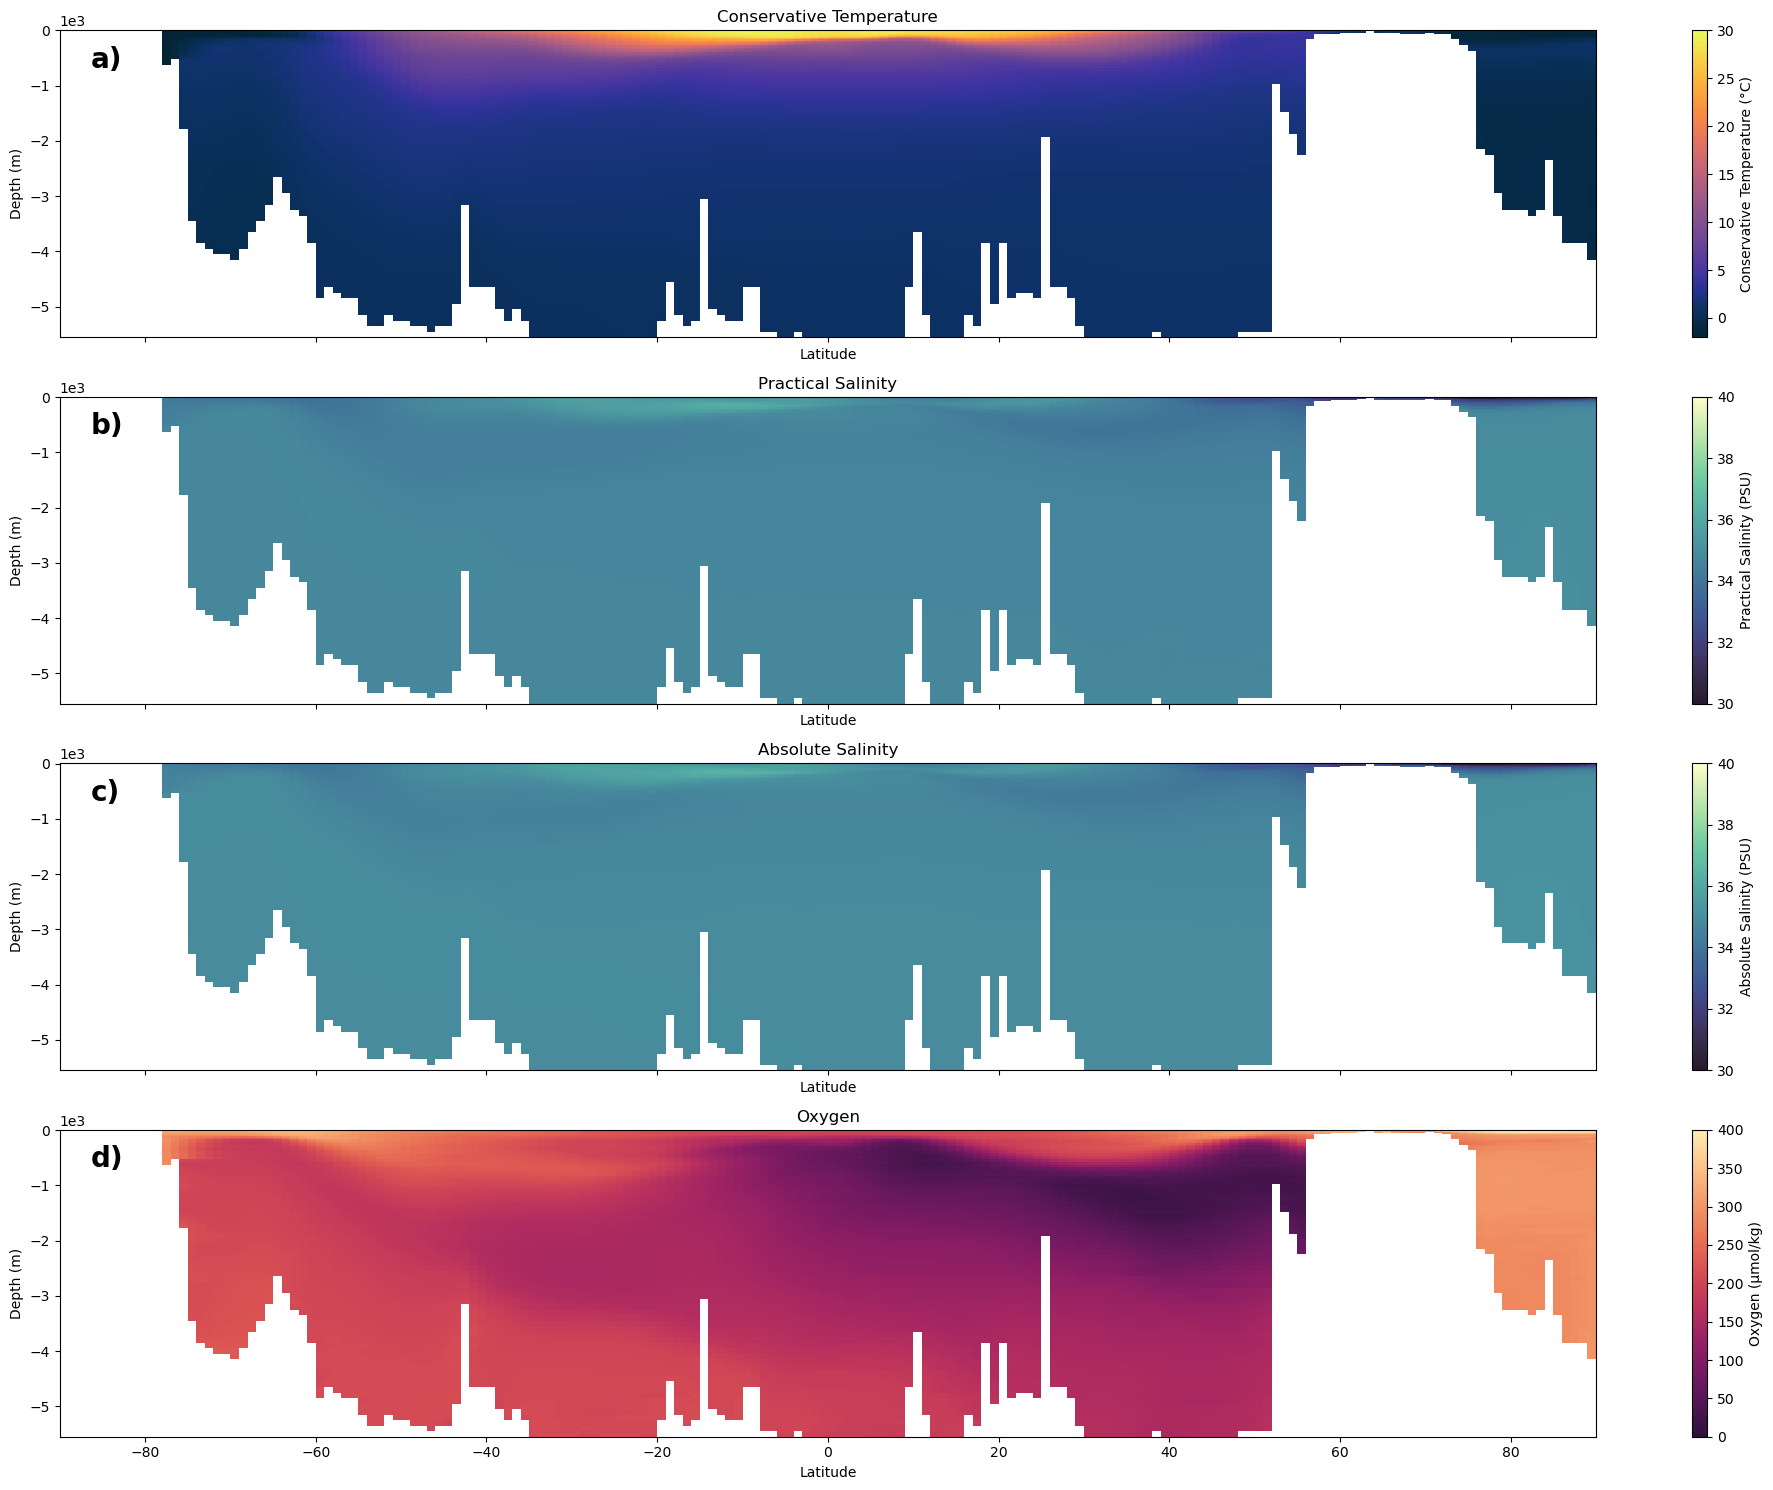

In [3]:
# Pacific Section

profile_pac = ds.sel(lon=-170,method='nearest')

fig, ax = plt.subplots(4,1, figsize=(20,15), sharex=True)

p1=ax[0].pcolormesh(profile_pac.lat, -profile_pac.depth, profile_pac['ct_an'], cmap=cmo.thermal, vmin=tmin, vmax=tmax)
plt.colorbar(p1, ax=ax[0], label='Conservative Temperature (°C)')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('Conservative Temperature')
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax[0].text(0.02, 0.95, "a)", transform=ax[0].transAxes, fontsize=20, fontweight='bold', verticalalignment='top')

p2=ax[1].pcolormesh(profile_pac.lat, -profile_pac.depth, profile_pac['s_an'], cmap=cmo.deep_r, vmin=salmin, vmax=salmax)
plt.colorbar(p2, ax=ax[1], label='Practical Salinity (PSU)')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('Practical Salinity')
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax[1].text(0.02, 0.95, "b)", transform=ax[1].transAxes, fontsize=20, fontweight='bold', verticalalignment='top')

p3=ax[2].pcolormesh(profile_pac.lat, -profile_pac.depth, profile_pac['abs_sal'], cmap=cmo.deep_r, vmin=salmin, vmax=salmax)
plt.colorbar(p3, ax=ax[2], label='Absolute Salinity (PSU)')
ax[2].set_xlabel('Latitude')
ax[2].set_ylabel('Depth (m)')
ax[2].set_title('Absolute Salinity')
ax[2].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax[2].text(0.02, 0.95, "c)", transform=ax[2].transAxes, fontsize=20, fontweight='bold', verticalalignment='top')

p4=ax[3].pcolormesh(profile_pac.lat, -profile_pac.depth, profile_pac['o_an'], cmap=cmo.matter_r, vmin=oxmin, vmax=oxmax)
plt.colorbar(p4, ax=ax[3], label='Oxygen (µmol/kg)')
ax[3].set_xlabel('Latitude')
ax[3].set_ylabel('Depth (m)')
ax[3].set_title('Oxygen')
ax[3].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax[3].text(0.02, 0.95, "d)", transform=ax[3].transAxes, fontsize=20, fontweight='bold', verticalalignment='top')

plt.tight_layout()
plt.savefig('images/Pacific_section.jpg', dpi=300, bbox_inches='tight', transparent=False, pad_inches=0.05)

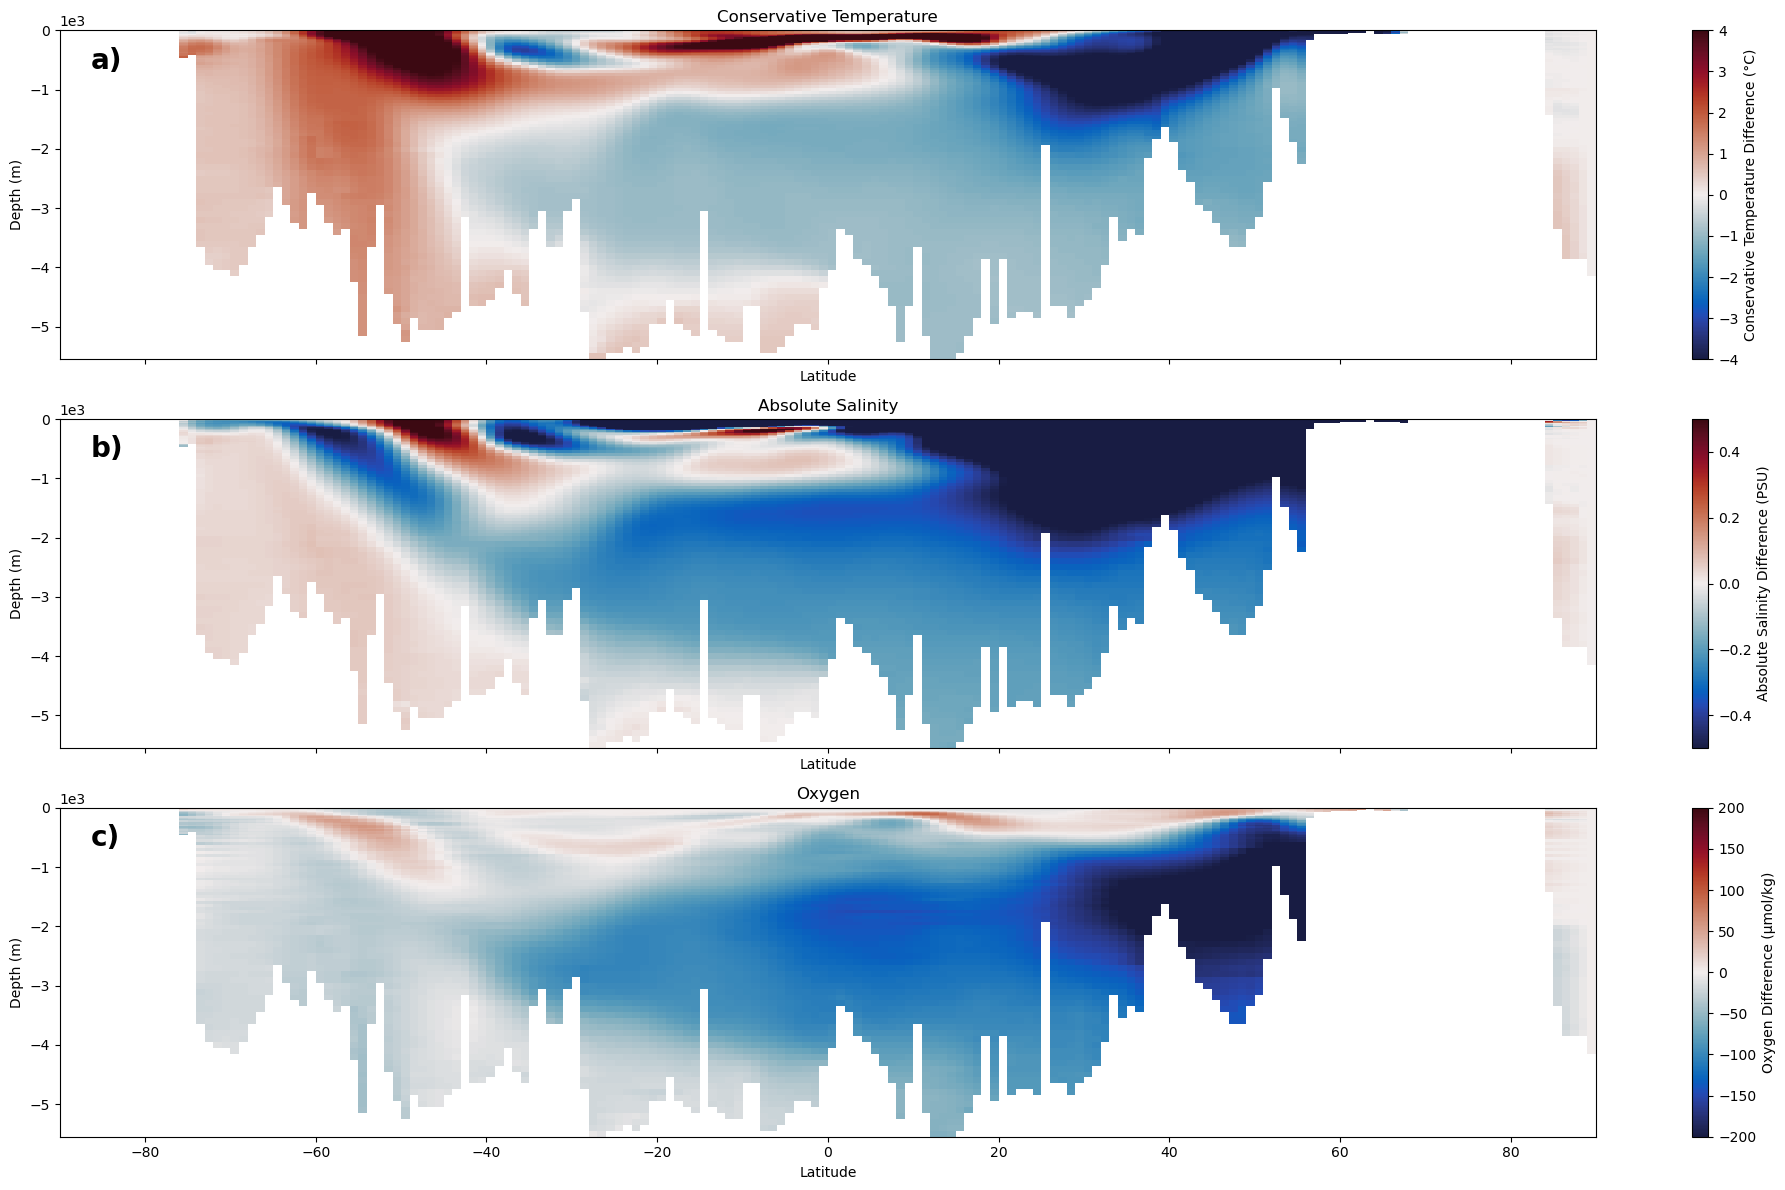

In [4]:
profile2 = profile_pac - profile_atl

dtemp = 4
dsal = 0.5
dox = 200

fig, ax = plt.subplots(3,1, figsize=(20,12), sharex=True)

p1=ax[0].pcolormesh(profile2.lat, -profile2.depth, profile2['ct_an'], cmap=cmo.balance, vmin=-dtemp, vmax=dtemp)
plt.colorbar(p1, ax=ax[0], label='Conservative Temperature Difference (°C)')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('Conservative Temperature')
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax[0].text(0.02, 0.95, "a)", transform=ax[0].transAxes, fontsize=20, fontweight='bold', verticalalignment='top')

p2=ax[1].pcolormesh(profile2.lat, -profile2.depth, profile2['abs_sal'], cmap=cmo.balance, vmin=-dsal, vmax=dsal)
plt.colorbar(p2, ax=ax[1], label='Absolute Salinity Difference (PSU)')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('Absolute Salinity')
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax[1].text(0.02, 0.95, "b)", transform=ax[1].transAxes, fontsize=20, fontweight='bold', verticalalignment='top')

p3=ax[2].pcolormesh(profile2.lat, -profile2.depth, profile2['o_an'], cmap=cmo.balance, vmin=-dox, vmax=dox)
plt.colorbar(p3, ax=ax[2], label='Oxygen Difference (µmol/kg)')
ax[2].set_xlabel('Latitude')
ax[2].set_ylabel('Depth (m)')
ax[2].set_title('Oxygen')
ax[2].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax[2].text(0.02, 0.95, "c)", transform=ax[2].transAxes, fontsize=20, fontweight='bold', verticalalignment='top')
plt.tight_layout()
plt.savefig('images/Section_comparison.jpg', dpi=300, bbox_inches='tight', transparent=False, pad_inches=0.05)


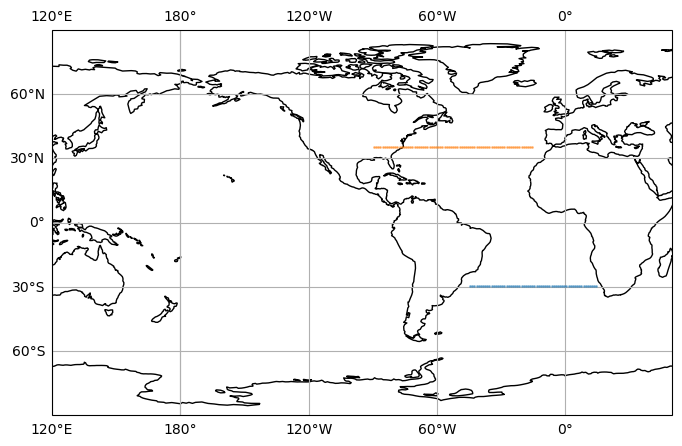

In [5]:
# TS diagrams
depth_3D=-xr.ones_like(ds.s_an)*ds.depth

AT_35N=ds['ct_an'].sel(lat=35,method='nearest').sel(lon=slice(-90,-15))
AS_35N=ds['s_an'].sel(lat=35,method='nearest').sel(lon=slice(-90,-15)) 
Adepth_35N=depth_3D.sel(lat=35,method='nearest').sel(lon=slice(-90,-15))

AT_30S=ds['ct_an'].sel(lat=-30,method='nearest').sel(lon=slice(-45,15))
AS_30S=ds['s_an'].sel(lat=-30,method='nearest').sel(lon=slice(-45,15)) 
Adepth_30S=depth_3D.sel(lat=-30,method='nearest').sel(lon=slice(-45,15))

atl_north_lons = AT_35N.lon.data
atl_north_lats = AT_35N.lat.data * np.ones_like(atl_north_lons)

atl_south_lons = AS_30S.lon.data
atl_south_lats = AS_30S.lat.data * np.ones_like(atl_south_lons)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-90))
ax.set_extent([120, 50, -90, 90],)

ax.scatter(atl_south_lons, atl_south_lats, marker='o', s=1, zorder=4, alpha=0.5, transform=ccrs.PlateCarree())
ax.scatter(atl_north_lons, atl_north_lats, marker='o', s=1, zorder=4, alpha=0.5, transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.show()

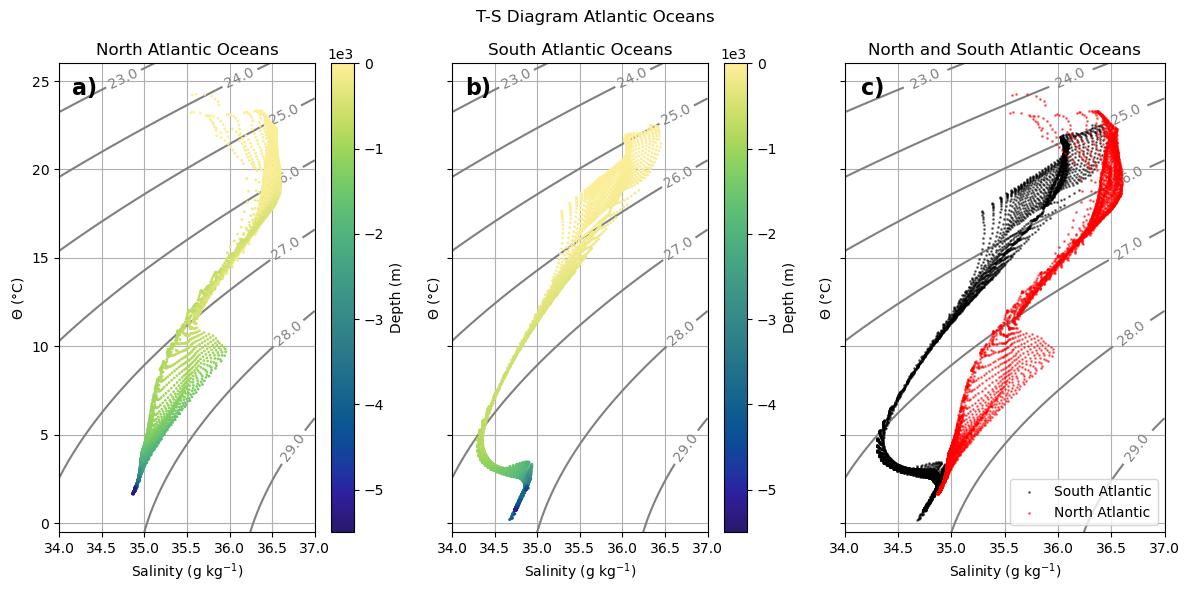

In [6]:
Tlevs=np.linspace(-0.5,26,100)
Slevs=np.linspace(34,37,100)
#create a grid of the T, S values
Slevs,Tlevs=np.meshgrid(Slevs,Tlevs)
#compute the density (at referenced to the surface) of the grid of T and S
rho=gsw.density.sigma0(Slevs,Tlevs)

fig, ax = plt.subplots(1, 3, figsize=(12,6), sharey=True)

cs1 = ax[0].contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax[0].clabel(cs1, cs1.levels, inline=True, fmt='%0.1f', fontsize=10)
ax[0].set_xlabel('Salinity (g kg$^{-1}$)')
ax[0].set_ylabel(r'$\Theta$ ($\degree$C)')
ax[0].set_title('North Atlantic Oceans')
ax[0].grid()

cs2 = ax[1].contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax[1].clabel(cs2, cs2.levels, inline=True, fmt='%0.1f', fontsize=10)
ax[1].set_xlabel('Salinity (g kg$^{-1}$)')
ax[1].set_ylabel(r'$\Theta$ ($\degree$C)')
ax[1].set_title('South Atlantic Oceans')
ax[1].grid()


cs3 = ax[2].contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax[2].clabel(cs3, cs3.levels, inline=True, fmt='%0.1f', fontsize=10)
ax[2].set_xlabel('Salinity (g kg$^{-1}$)')
ax[2].set_ylabel(r'$\Theta$ ($\degree$C)')
ax[2].set_title('North and South Atlantic Oceans')
ax[2].grid()

a1=ax[0].scatter(AS_35N, AT_35N, c=Adepth_35N,marker='o',s=1, zorder=4, cmap=cmo.haline, vmin=-5500, vmax=0)
cbar1=plt.colorbar(a1, label='Depth (m)')
cbar1.formatter.set_powerlimits((0, 0))
ax[0].text(0.05, 0.97, "a)", transform=ax[0].transAxes, fontsize=16, fontweight='bold', verticalalignment='top')

a2=ax[1].scatter(AS_30S, AT_30S, c=Adepth_30S,marker='o',s=1, zorder=5, cmap=cmo.haline, vmin=-5500, vmax=0)
cbar2=plt.colorbar(a2, label='Depth (m)')
cbar2.formatter.set_powerlimits((0, 0))
ax[1].text(0.05, 0.97, "b)", transform=ax[1].transAxes, fontsize=16, fontweight='bold', verticalalignment='top')

south_atlantic=ax[2].scatter(AS_30S, AT_30S, c="black",marker='o', label='South Atlantic', s=1, zorder=4, alpha=0.5)
north_atlantic=ax[2].scatter(AS_35N, AT_35N, c="red",marker='o', label='North Atlantic', s=1, zorder=5, alpha=0.5)
ax[2].text(0.05, 0.97, "c)", transform=ax[2].transAxes, fontsize=16, fontweight='bold', verticalalignment='top')

plt.legend()

fig.suptitle('T-S Diagram Atlantic Oceans')
fig.tight_layout()
fig.savefig('images/T-S_diagram_Atlantic.jpg', dpi=300, bbox_inches='tight', transparent=False, pad_inches=0.05)

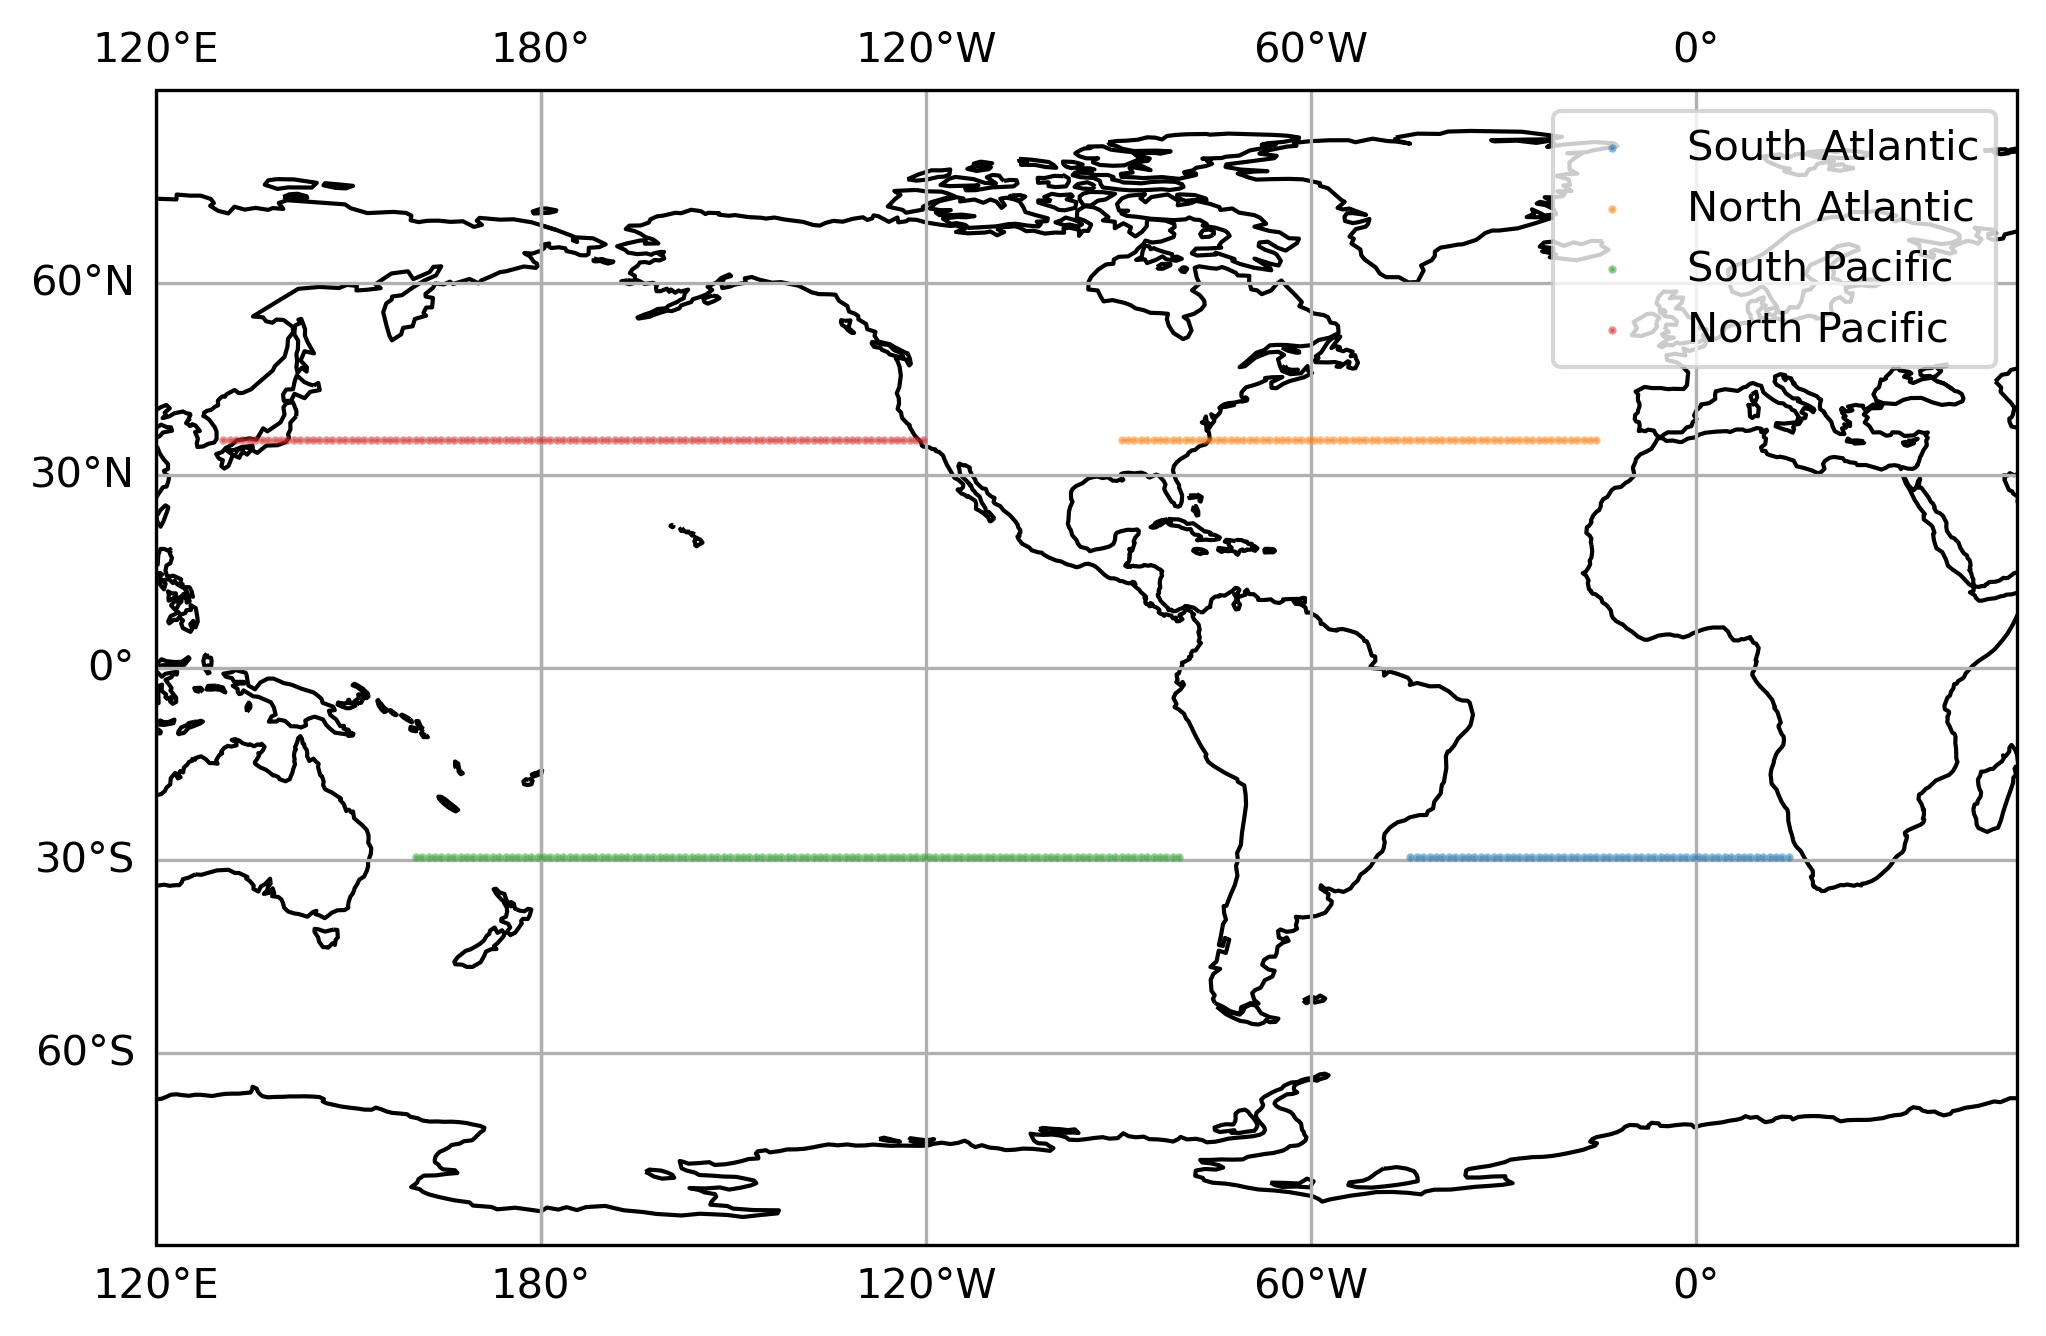

In [7]:
# TS diagrams
depth_3D=-xr.ones_like(ds.s_an)*ds.depth

PT_35N=xr.concat([ds['ct_an'].sel(lat=35,method='nearest').sel(lon=slice(130,None)),
                ds['ct_an'].sel(lat=35,method='nearest').sel(lon=slice(-180,-120))],dim='lon')
PS_35N=xr.concat([ds['s_an'].sel(lat=35,method='nearest').sel(lon=slice(130,None)),
                ds['s_an'].sel(lat=35,method='nearest').sel(lon=slice(-180,-120))],dim='lon')
Pdepth_35N=xr.concat([depth_3D.sel(lat=35,method='nearest').sel(lon=slice(130,None)),
                depth_3D.sel(lat=35,method='nearest').sel(lon=slice(-180,-120))],dim='lon')


#1b. Get data at 30s and 160E to 80W
PT_30S=xr.concat([ds['ct_an'].sel(lat=-30,method='nearest').sel(lon=slice(160,None)),
                ds['ct_an'].sel(lat=-30,method='nearest').sel(lon=slice(-180,-80))],dim='lon')
PS_30S=xr.concat([ds['s_an'].sel(lat=-30,method='nearest').sel(lon=slice(160,None)),
                ds['s_an'].sel(lat=-30,method='nearest').sel(lon=slice(-180,-80))],dim='lon')
Pdepth_30S=xr.concat([depth_3D.sel(lat=-30,method='nearest').sel(lon=slice(160,None)),
                depth_3D.sel(lat=-30,method='nearest').sel(lon=slice(-180,-80))],dim='lon')

pac_north_lons = PT_35N.lon.data
pac_north_lats = PT_35N.lat.data * np.ones_like(pac_north_lons)

pac_south_lons = PS_30S.lon.data
pac_south_lats = PS_30S.lat.data * np.ones_like(pac_south_lons)


fig = plt.figure(figsize=(10, 5), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-90))
ax.set_extent([120, 50, -90, 90],)
#ax.set_extent([-180, 180, -90, 90],)

ax.scatter(atl_south_lons, atl_south_lats, marker='o', s=1, zorder=4, alpha=0.5, transform=ccrs.PlateCarree(), label='South Atlantic')
ax.scatter(atl_north_lons, atl_north_lats, marker='o', s=1, zorder=4, alpha=0.5, transform=ccrs.PlateCarree(), label='North Atlantic')
ax.scatter(pac_south_lons, pac_south_lats, marker='o', s=1, zorder=4, alpha=0.5, transform=ccrs.PlateCarree(), label='South Pacific')
ax.scatter(pac_north_lons, pac_north_lats, marker='o', s=1, zorder=4, alpha=0.5, transform=ccrs.PlateCarree(), label='North Pacific')
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.set_aspect('equal')
ax.legend()
fig.savefig('images/Sections_locations.jpg', bbox_inches='tight', transparent=False, pad_inches=0.05)

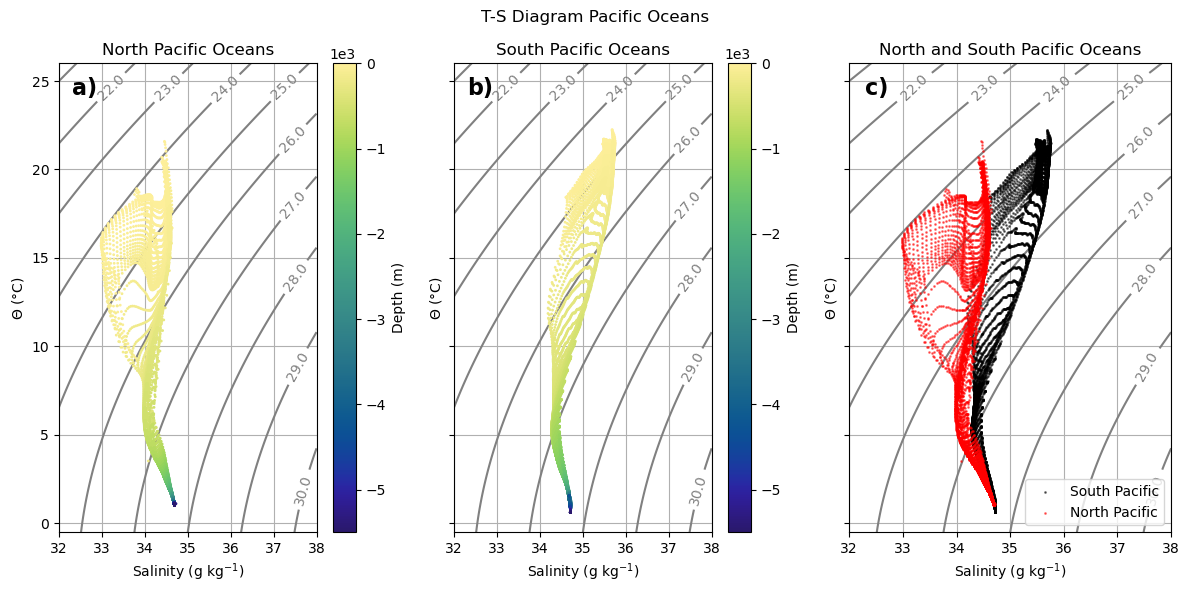

In [8]:
Tlevs=np.linspace(-0.5,26,100)
Slevs=np.linspace(32,38,100)
#create a grid of the T, S values
Slevs,Tlevs=np.meshgrid(Slevs,Tlevs)
#compute the density (at referenced to the surface) of the grid of T and S
rho=gsw.density.sigma0(Slevs,Tlevs)

fig, ax = plt.subplots(1, 3, figsize=(12,6), sharex=True, sharey=True)

cs1 = ax[0].contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax[0].clabel(cs1, cs1.levels, inline=True, fmt='%0.1f', fontsize=10)
ax[0].set_xlabel('Salinity (g kg$^{-1}$)')
ax[0].set_ylabel(r'$\Theta$ ($\degree$C)')
ax[0].set_title('North Pacific Oceans')
ax[0].grid()

cs2 = ax[1].contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax[1].clabel(cs2, cs2.levels, inline=True, fmt='%0.1f', fontsize=10)
ax[1].set_xlabel('Salinity (g kg$^{-1}$)')
ax[1].set_ylabel(r'$\Theta$ ($\degree$C)')
ax[1].set_title('South Pacific Oceans')
ax[1].grid()

cs3 = ax[2].contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax[2].clabel(cs3, cs3.levels, inline=True, fmt='%0.1f', fontsize=10)
ax[2].set_xlabel('Salinity (g kg$^{-1}$)')
ax[2].set_ylabel(r'$\Theta$ ($\degree$C)')
ax[2].set_title('North and South Pacific Oceans')
ax[2].grid()

p1 = ax[0].scatter(PS_35N, PT_35N, c=Pdepth_35N,marker='o',s=1, zorder=4, cmap=cmo.haline, vmin=-5500, vmax=0)
cbar1=plt.colorbar(p1, ax=ax[0], label='Depth (m)')
cbar1.formatter.set_powerlimits((0, 0))
ax[0].text(0.05, 0.97, "a)", transform=ax[0].transAxes, fontsize=16, fontweight='bold', verticalalignment='top')

p2 = ax[1].scatter(PS_30S, PT_30S, c=Pdepth_30S,marker='o',s=1, zorder=5, cmap=cmo.haline, vmin=-5500, vmax=0)
cbar2=plt.colorbar(p2, ax=ax[1], label='Depth (m)')
cbar2.formatter.set_powerlimits((0, 0))
ax[1].text(0.05, 0.97, "b)", transform=ax[1].transAxes, fontsize=16, fontweight='bold', verticalalignment='top')

south_atlantic=ax[2].scatter(PS_30S, PT_30S, c="black",marker='o', label='South Pacific', s=1, zorder=4, alpha=0.5)
north_atlantic=ax[2].scatter(PS_35N, PT_35N, c="red",marker='o', label='North Pacific', s=1, zorder=5, alpha=0.5)
ax[2].text(0.05, 0.97, "c)", transform=ax[2].transAxes, fontsize=16, fontweight='bold', verticalalignment='top')

plt.legend()

fig.suptitle('T-S Diagram Pacific Oceans')
fig.tight_layout()
fig.savefig('images/T-S_diagram_Pacific.jpg', dpi=300, bbox_inches='tight', transparent=False, pad_inches=0.05)

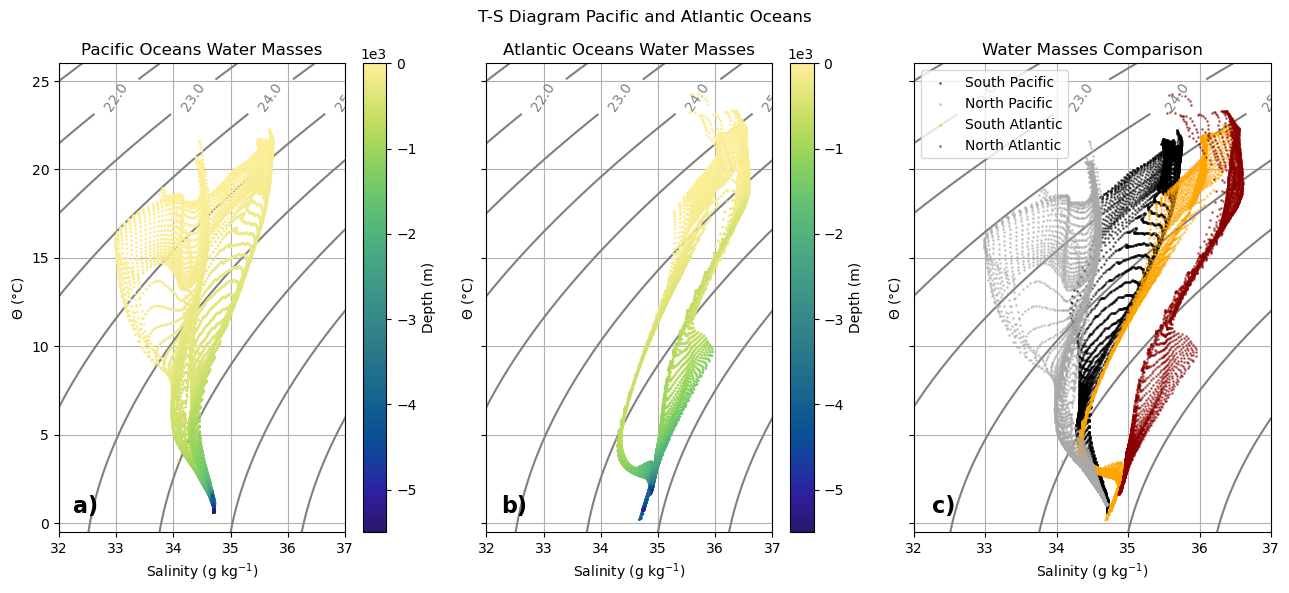

In [9]:
Tlevs=np.linspace(-0.5,26,100)
Slevs=np.linspace(30,40,100)
#create a grid of the T, S values
Slevs,Tlevs=np.meshgrid(Slevs,Tlevs)
#compute the density (at referenced to the surface) of the grid of T and S
rho=gsw.density.sigma0(Slevs,Tlevs)

fig, ax = plt.subplots(1, 3, figsize=(13,6), sharex=True, sharey=True)

cs1 = ax[0].contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax[0].clabel(cs1, cs1.levels, inline=True, fmt='%0.1f', fontsize=10)
ax[0].set_xlabel('Salinity (g kg$^{-1}$)')
ax[0].set_ylabel(r'$\Theta$ ($\degree$C)')
ax[0].set_title('Pacific Oceans Water Masses')
ax[0].grid()

cs2 = ax[1].contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax[1].clabel(cs2, cs2.levels, inline=True, fmt='%0.1f', fontsize=10)
ax[1].set_xlabel('Salinity (g kg$^{-1}$)')
ax[1].set_ylabel(r'$\Theta$ ($\degree$C)')
ax[1].set_title('Atlantic Oceans Water Masses')
ax[1].grid()

cs3 = ax[2].contour(Slevs,Tlevs,rho,levels=np.arange(20,35,1),colors='0.5')
ax[2].clabel(cs3, cs3.levels, inline=True, fmt='%0.1f', fontsize=10)
ax[2].set_xlabel('Salinity (g kg$^{-1}$)')
ax[2].set_ylabel(r'$\Theta$ ($\degree$C)')
ax[2].set_title('Water Masses Comparison')
ax[2].grid()

f1=ax[0].scatter(PS_35N, PT_35N, c=Pdepth_35N, marker='o',s=1, zorder=4, label='North Pacific', cmap=cmo.haline, vmin=-5500, vmax=0)
cbar1=plt.colorbar(f1, ax=ax[0], label='Depth (m)')
cbar1.formatter.set_powerlimits((0, 0))
f2=ax[0].scatter(PS_30S, PT_30S, c=Pdepth_30S, marker='o',s=1, zorder=5, label='South Pacific', cmap=cmo.haline, vmin=-5500, vmax=0)

f3=ax[1].scatter(AS_35N, AT_35N, c=Adepth_35N, marker='o',s=1, zorder=4, label='North Atlantic', cmap=cmo.haline, vmin=-5500, vmax=0)
cbar3=plt.colorbar(f3, ax=ax[1], label='Depth (m)')
cbar3.formatter.set_powerlimits((0, 0))
f4=ax[1].scatter(AS_30S, AT_30S, c=Adepth_30S, marker='o',s=1, zorder=5, label='South Atlantic', cmap=cmo.haline, vmin=-5500, vmax=0)

south_atlantic=ax[2].scatter(PS_30S, PT_30S, c="black",marker='o', label='South Pacific', s=1, zorder=4, alpha=0.5)
north_atlantic=ax[2].scatter(PS_35N, PT_35N, c="darkgrey",marker='o', label='North Pacific', s=1, zorder=5, alpha=0.5)
south_atlantic=ax[2].scatter(AS_30S, AT_30S, c="orange",marker='o', label='South Atlantic', s=1, zorder=4, alpha=0.5)
north_atlantic=ax[2].scatter(AS_35N, AT_35N, c="darkred",marker='o', label='North Atlantic', s=1, zorder=5, alpha=0.5)

ax[0].text(0.05, 0.03, "a)", transform=ax[0].transAxes, fontsize=16, fontweight='bold', verticalalignment='bottom')
ax[1].text(0.05, 0.03, "b)", transform=ax[1].transAxes, fontsize=16, fontweight='bold', verticalalignment='bottom')
ax[2].text(0.05, 0.03, "c)", transform=ax[2].transAxes, fontsize=16, fontweight='bold', verticalalignment='bottom')

ax[2].set_xlim(32,37)


plt.legend()

fig.suptitle('T-S Diagram Pacific and Atlantic Oceans')
fig.tight_layout()
fig.savefig('images/T-S_diagram_Comparison.jpg', dpi=300, bbox_inches='tight', transparent=False, pad_inches=0.05)